<a href="https://colab.research.google.com/github/rahulkhankar/SelfProject/blob/master/Sentiment_classification_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk

In [2]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag

In [3]:
from nltk.corpus import twitter_samples

In [5]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [6]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
#text = twitter_samples.strings('tweets.20150430-223406.json')

In [7]:
positive_tweets

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
 '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM',
 "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI",
 '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.',
 'Jgh , but we have to go to Bayan :D bye',
 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing 

In [8]:
len(positive_tweets)

5000

In [9]:
len(negative_tweets)

5000

In [10]:
#making labels 1 = Positive , 0 = Negative
label=list()
for i in range(len(positive_tweets)):
    label.append(int(1))

In [11]:
for i in range(len(negative_tweets)):
    label.append(int(0))

In [12]:
len(label)

10000

In [13]:
dataset_total=positive_tweets+negative_tweets

In [14]:
dataset_total[0]

'#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)'

## Convert to lower case

In [15]:
lower_data=list()
for i in dataset_total:
    lower_data.append(i.lower())

In [16]:
lower_data[0]

'#followfriday @france_inte @pkuchly57 @milipol_paris for being top engaged members in my community this week :)'

## Remove punctuation

In [17]:
import re, string

In [18]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [19]:
stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before','to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than','s', 't', 'can', 'will', 'just', 'don', "don't", 'should','now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'ma', "weren't", 'won']

In [20]:
all_review1=list()
for i in lower_data:
    token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', i) 
    token = re.sub("(@[A-Za-z0-9_]+)","", i)  #This is for usernames
    if token.lower() not in stop_words:  #Add words if not in stop words
        all_review1.append(token)

In [21]:
all_review1 #Usernames removed

['#followfriday    for being top engaged members in my community this week :)',
 ' hey james! how odd :/ please call our contact centre on 02392441234 and we will be able to assist you :) many thanks!',
 ' we had a listen last night :) as you bleed is an amazing track. when are you in scotland?!',
 ' congrats :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
 '  this one is irresistible :)\n#flipkartfashionfriday http://t.co/ebz0l2venm',
 "we don't like to keep our lovely customers waiting for long! we hope you enjoy! happy friday! - lwwf :) https://t.co/smyyriipxi",
 ' on second thought, there’s just not enough time for a dd :) but new shorts entering system. sheep must be buying.',
 'jgh , but we have to go to bayan :d bye',
 'as an act of mischievousness, am calling the etl layer of our in-house warehousing app katamari.\n\nwell… as the name implies :p.',
 '#followfriday   for being top influencers in my community thi

In [22]:
all_review2=list()
for i in range(len(all_review1)):
    token = re.sub('http[s]?://\S+', '', all_review1[i]) #Remove hyperlink from tweets
    all_review2.append(token)

In [23]:
all_review2# This is to remove hyperlink from review

['#followfriday    for being top engaged members in my community this week :)',
 ' hey james! how odd :/ please call our contact centre on 02392441234 and we will be able to assist you :) many thanks!',
 ' we had a listen last night :) as you bleed is an amazing track. when are you in scotland?!',
 ' congrats :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
 '  this one is irresistible :)\n#flipkartfashionfriday ',
 "we don't like to keep our lovely customers waiting for long! we hope you enjoy! happy friday! - lwwf :) ",
 ' on second thought, there’s just not enough time for a dd :) but new shorts entering system. sheep must be buying.',
 'jgh , but we have to go to bayan :d bye',
 'as an act of mischievousness, am calling the etl layer of our in-house warehousing app katamari.\n\nwell… as the name implies :p.',
 '#followfriday   for being top influencers in my community this week :)',
 "who wouldn't love these big....

In [24]:
len(all_review)

NameError: ignored

# Lemmatize words

In [25]:
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return (lemmatized_sentence)

pos_tag function provide a list of tokens as an argument to get the tags

CC Coordinating conjunction

CD Cardinal number

DT Determiner

EX Existential there

FW Foreign word

IN Preposition or subordinating conjunction

JJ Adjective

JJR Adjective, comparative

JJS Adjective, superlative

1LS List item marker

MD Modal

NN Noun, singular or mass

NNS Noun, plural

NNP Proper noun, singular

NNPS Proper noun, plural

PDT Predeterminer

POS Possessive ending

PRP Personal pronoun

PRP$ Possessive pronoun

RB Adverb

RBR Adverb, comparative

RBS Adverb, superlative

RP Particle

SYM Symbol

TO to

UH Interjection

VB Verb, base form

VBD Verb, past tense

VBG Verb, gerund or present participle

VBN Verb, past participle

VBP Verb, non-3rd person singular present

VBZ Verb, 3rd person singular present

WDT Wh-determiner

WP Wh-pronoun

WP$ Possessive wh-pronoun

WRB Wh-adverb

In [32]:
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')

In [33]:
all_review = list()
for i in range(len(all_review2)):
    token = lemmatize_sentence(all_review2[i].split())
    all_review.append(token)

In [34]:
all_review[0]

['#followfriday',
 'for',
 'be',
 'top',
 'engage',
 'member',
 'in',
 'my',
 'community',
 'this',
 'week',
 ':)']

##  Encode the words

In [35]:
import tensorflow as tf

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [38]:
review_split=[]
for i in all_review:
    review_split.append(i)

In [39]:
print ('Number of reviews :', len(review_split))

Number of reviews : 10000


In [40]:
review_split[198]

['i',
 'love',
 'you',
 'all',
 'goodnight.',
 'vid',
 'go',
 'up',
 'when',
 'i',
 'wake',
 'up',
 'you',
 'all',
 'with',
 'love',
 'this',
 'one',
 ':)']

## Analyze Reviews Length

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
reviews_len = list()
for i in range(len(review_split)):
    reviews_len.append(len(review_split[i]))
    

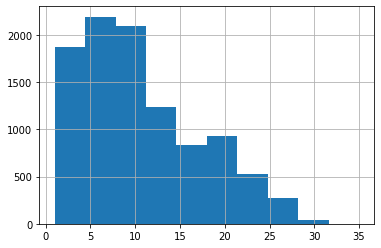

count    10000.000000
mean        10.659500
std          6.567608
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         35.000000
dtype: float64

In [43]:
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [44]:
review_split = [ review_split[i] for i, l in enumerate(reviews_len) if l>0 ]
label = [ label[i] for i, l in enumerate(reviews_len) if l> 0 ]

In [54]:
all_review[0]

['#followfriday',
 'for',
 'be',
 'top',
 'engage',
 'member',
 'in',
 'my',
 'community',
 'this',
 'week',
 ':)']

In [45]:
len(review_split)

10000

In [46]:
len(label)

10000

In [47]:
from collections import Counter

In [55]:
all_word = ' '.join(all_review1)


In [56]:
words = all_word.split()

In [57]:
words[0]

'#followfriday'

In [58]:
max_words = len(words)
max_words

108342

In [59]:
' '.join(review_split[0])

'#followfriday for be top engage member in my community this week :)'

## One hot representation

In [60]:
vocab_size = max_words
encoded_docs = [tf.keras.preprocessing.text.one_hot(text=' '.join(d), n=vocab_size,lower=False) for d in review_split]
print(encoded_docs)

[[78399, 74904, 100643, 6255, 31614, 20703, 37972, 22906, 40825, 35937, 78338], [39256, 47280, 42639, 51152, 11723, 6834, 107407, 36534, 9675, 86005, 22691, 98398, 81040, 10069, 100643, 38370, 27339, 2178, 40547, 8678, 57084], [81040, 62182, 40303, 89770, 32217, 57678, 42868, 40547, 106029, 100643, 56438, 106525, 3452, 55185, 100643, 40547, 37972, 91171], [102234], [81398, 2086, 22906, 88304, 58463, 55591, 62182, 12492, 19868, 40303, 57393, 59344, 72822, 86005, 22906, 58571, 7880, 37972, 104665, 41695], [35937, 82945, 100643, 103711, 18520], [81040, 45835, 42291, 27339, 94350, 107407, 9053, 97464, 54480, 74904, 75108, 81040, 104685, 40547, 5863, 73058, 13350, 86596], [86005, 28802, 88385, 71755, 86672, 40958, 74481, 10569, 74904, 40303, 59681, 5759, 68634, 91290, 80000, 105994, 92935, 18414, 100643, 29174], [34894, 5759, 81040, 62182, 27339, 104723, 27339, 83737, 93164, 14574], [42868, 56438, 23129, 26030, 10029, 100643, 6834, 33317, 63942, 19631, 26030, 107407, 37972, 37926, 82837, 76

In [61]:
len(encoded_docs[0])

11

In [62]:
review_split[0][0]

'#followfriday'

In [63]:
max_length = 40
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[ 78399  74904 100643 ...      0      0      0]
 [ 39256  47280  42639 ...      0      0      0]
 [ 81040  62182  40303 ...      0      0      0]
 ...
 [  2051  88463  33317 ...      0      0      0]
 [  5759   5759  26663 ...      0      0      0]
 [ 42868  40303 106541 ...      0      0      0]]


# Train_Test Split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,Flatten
from keras.callbacks import EarlyStopping

In [66]:
import keras

In [67]:
X_train, X_test, y_train, y_test = train_test_split(padded_docs, label, test_size=0.2, random_state=42)

In [68]:
embedding_dimension=20


In [69]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dimension, input_length=max_length))
model.add(LSTM(embedding_dimension,dropout=0.3))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# compile the model
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 20)            2166840   
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 2,170,141
Trainable params: 2,170,141
Non-trainable params: 0
_________________________________________________________________
None


In [70]:
from keras.callbacks import ModelCheckpoint

In [71]:
#This is to save best weight for Model
monitor = ModelCheckpoint('best_weight.hdf5',monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True
)

In [72]:
# fit the model

history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),callbacks=[monitor], epochs=50,shuffle=True,batch_size=100, verbose=1)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 5s 643us/step - loss: 0.6932 - accuracy: 0.5034 - val_loss: 0.6931 - val_accuracy: 0.5060

Epoch 00001: val_accuracy improved from -inf to 0.50600, saving model to best_weight.hdf5
Epoch 2/50
8000/8000 [==============================] - 4s 537us/step - loss: 0.6931 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy: 0.4940

Epoch 00002: val_accuracy did not improve from 0.50600
Epoch 3/50
8000/8000 [==============================] - 4s 533us/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6932 - val_accuracy: 0.4940

Epoch 00003: val_accuracy did not improve from 0.50600
Epoch 4/50
8000/8000 [==============================] - 4s 540us/step - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.4940

Epoch 00004: val_accuracy did not improve from 0.50600
Epoch 5/50
8000/8000 [==============================] - 4s 527us/step - loss: 0.6932 - accuracy: 0.4978 - val

# Performance metrics

In [ ]:
#from keras.models import load_model
#model = load_model('best_weight.hdf5')

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [73]:
y_pred = model.predict(X_test)


In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [75]:
y_pred = [1 if i>0.5 else 0 for i in y_pred]

In [76]:
confusion_matrix(y_test,y_pred)

array([[781, 207],
       [244, 768]])

In [77]:
accuracy_score(y_test,y_pred)

0.7745

# Plot loss and accuracy

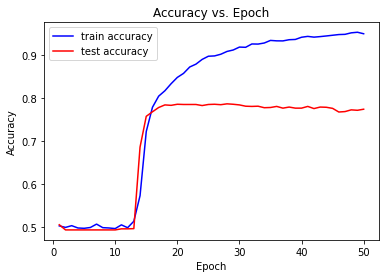

In [78]:
def plot_accuracy(train_accuracy,test_accuracy):
    '''Function to plot the accuracy vs. epoch'''
    x = list(range(1, len(train_accuracy) + 1))
    plt.plot(x, train_accuracy, color = 'blue', label = 'train accuracy')
    plt.plot(x, test_accuracy, color = 'red', label = 'test accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')
train_accuracy = history.history['accuracy'] 
test_accuracy = history.history['val_accuracy'] 
plot_accuracy(train_accuracy,test_accuracy) 

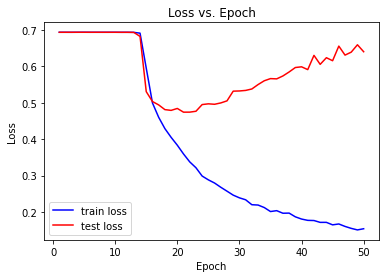

In [79]:
def plot_loss(train_loss,test_loss):
    '''Function to plot the loss vs. epoch'''
    x = list(range(1, len(train_loss) + 1))
    plt.plot(x, train_loss, color = 'blue', label = 'train loss')
    plt.plot(x, test_loss, color = 'red', label = 'test loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plot_loss(train_loss,test_loss) 

# Predict

In [80]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences

In [81]:
from keras.models import load_model

In [82]:
model = load_model('best_weight.hdf5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [83]:
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word.lower(), pos))
    return (lemmatized_sentence)

In [84]:
def predict_preprocess(predict):
    predict = lemmatize_sentence(predict)
    token=list()
    for i in predict:
        t=tf.keras.preprocessing.text.one_hot(text=i, n=vocab_size,lower=True)
        token.extend(t)
    token=[token]
    padded_predict = pad_sequences(token, maxlen=max_length, padding='post')
    return(padded_predict)

# Input sentence

In [85]:
predict = 'this is best movie'

In [86]:
predict = predict.split()
predict

['this', 'is', 'best', 'movie']

In [87]:
predict = lemmatize_sentence(predict)
predict

['this', 'be', 'best', 'movie']

In [88]:
padded_predict = predict_preprocess(predict)

In [89]:
padded_predict

array([[ 35937, 100643,  65212,  54984,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0]],
      dtype=int32)

In [90]:
score=model.predict(padded_predict)

In [91]:
score

array([[0.59393]], dtype=float32)

In [92]:
if(score>0.5):
    print('Review is : Positive')
else:
    print('Review is : Negative')

Review is : Positive
